In [1]:
# Import modules
import tensorflow as tf 
import matplotlib.pyplot as plt   
import warnings 
warnings.filterwarnings('ignore')

KeyboardInterrupt: 

In [ ]:
# Get current directory
import os 
print(f"Current directory: {os.getcwd()}")
curr_dir = os.getcwd()

Current directory: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection


In [ ]:
# Training path
train_path = os.path.join(curr_dir, "dataset", "Train")
print(f"Training path: {train_path}")

Training path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Train


In [ ]:
# Validation path
valid_path = os.path.join(curr_dir, "dataset", "Valid")
print(f"Validation path: {valid_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Valid


In [ ]:
# Testing path
test_path = os.path.join(curr_dir, "dataset", "Test")
print(f"Validation path: {test_path}")

Validation path: c:\Users\SURAPTO\Edunet_Foundation_Internship\Techsaksham\Potato_Leaf_Disease_Detection\dataset\Test


In [ ]:
# Load training dataset
train_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 900 files belonging to 3 classes.


In [ ]:
# Class names in training dataset
train_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Load validation dataset
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [ ]:
# Class names in validation dataset
valid_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Load testing dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(128, 128),
    shuffle=True,
    interpolation='bilinear'
)

Found 300 files belonging to 3 classes.


In [ ]:
# Class names in testing dataset
test_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Generate the Convolutional Neural Network (CNN)
cnn = tf.keras.models.Sequential()

# First block
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second block
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Third block
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fourth block
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Fifth block
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Remove 25% of the neurons
cnn.add(tf.keras.layers.Dropout(0.25))

# Reduces dimension of the image
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
# Compile the CNN
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Summary of the CNN
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
train_history = cnn.fit(x=train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3979 - loss: 1.6042 - val_accuracy: 0.7167 - val_loss: 0.6146
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7236 - loss: 0.6171 - val_accuracy: 0.7767 - val_loss: 0.4953
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7690 - loss: 0.4968 - val_accuracy: 0.8033 - val_loss: 0.4582
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8449 - loss: 0.3865 - val_accuracy: 0.8233 - val_loss: 0.4035
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8418 - loss: 0.3368 - val_accuracy: 0.8967 - val_loss: 0.2117
Epoch 6/10
16/29 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9426 - loss: 0.1558

KeyboardInterrupt: 

In [ ]:
# Compute training loss and training accuracy
train_loss, train_acc = cnn.evaluate(train_set)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_acc}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.9403 - loss: 0.1549
Training loss: 0.13784553110599518
Training accuracy: 0.945555567741394


In [ ]:
# Compute validation loss and validation accuracy
valid_loss, valid_acc = cnn.evaluate(valid_set)
print(f"Validation loss: {valid_loss}")
print(f"Validation accuracy: {valid_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.9394 - loss: 0.1560
Validation loss: 0.20406736433506012
Validation accuracy: 0.9300000071525574


In [ ]:
# Display training history
train_history.history

{'accuracy': [0.44777777791023254,
  0.6644444465637207,
  0.8277778029441833,
  0.8733333349227905,
  0.8844444155693054,
  0.8788889050483704,
  0.9200000166893005,
  0.9377777576446533,
  0.9555555582046509,
  0.9422222375869751],
 'loss': [1.1434435844421387,
  0.7184217572212219,
  0.40987735986709595,
  0.3353753387928009,
  0.3021763563156128,
  0.2973848879337311,
  0.20709261298179626,
  0.1710297167301178,
  0.1241026222705841,
  0.1505836695432663],
 'val_accuracy': [0.5733333230018616,
  0.8166666626930237,
  0.8333333134651184,
  0.846666693687439,
  0.9200000166893005,
  0.8799999952316284,
  0.8999999761581421,
  0.9266666769981384,
  0.9366666674613953,
  0.9300000071525574],
 'val_loss': [0.956368625164032,
  0.45477911829948425,
  0.3419803977012634,
  0.34099453687667847,
  0.21207910776138306,
  0.2711458206176758,
  0.2479240447282791,
  0.15839533507823944,
  0.1618306040763855,
  0.20406736433506012]}

In [ ]:
# Write training history into a JSON file
import json
with open('training_history.json','w') as f:
  json.dump(train_history.history,f)

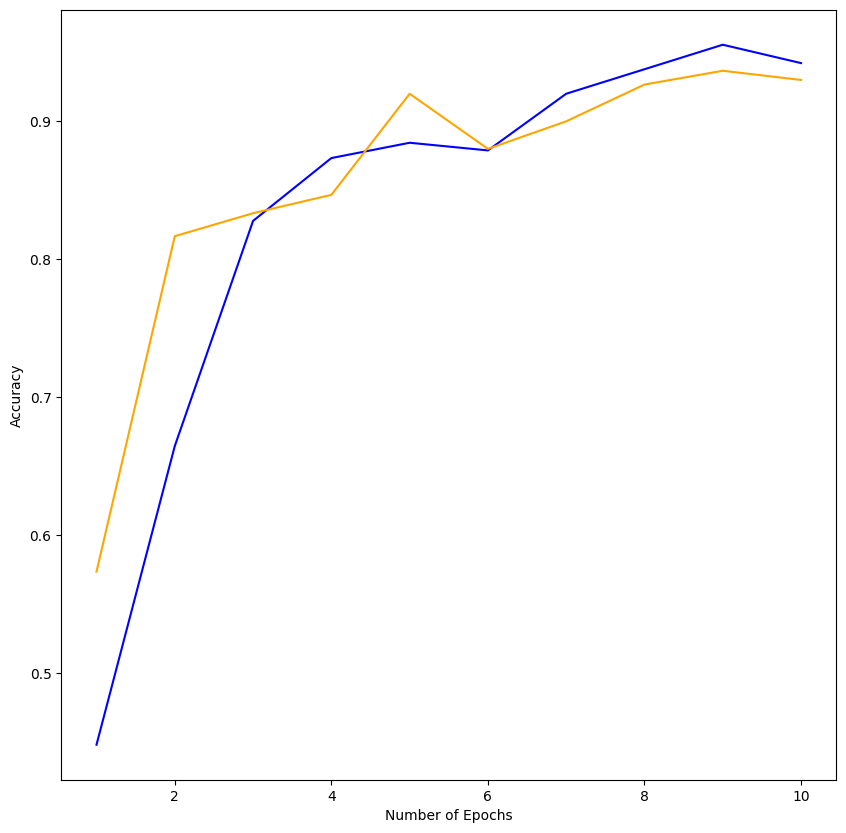

In [ ]:
# Plot accuracy for training and validation for various epochs
epochs = [i for i in range(1, 11)]
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(epochs, train_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Save the model
cnn.save('potato_leaf_disease_detection_model.keras')